In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as snb
import string

In [3]:
data = pd.read_csv('fake_job_postings.csv')

In [4]:
data.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
data.drop(['job_id' , 'salary_range' , 'telecommuting' , 'has_company_logo' , 'has_questions'] , axis = 1,inplace = True)

In [9]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
data.shape

(17880, 13)

In [11]:
data.fillna(' ',inplace=True)

In [12]:
data.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [13]:
# TO find the fake job titles

data.title.value_counts()[:11]



English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [14]:
data[data.fraudulent == 1].title.value_counts()[:11]

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Name: title, dtype: int64

In [15]:
data[data.fraudulent == 0].title.value_counts()[:11]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [16]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [17]:
data['text'] = data['title'] + ' '+ data['location'] + ' ' + data['department'] + ' ' + data['company_profile'] + ' '+ data['description'] + ' ' + data['requirements'] + ' ' + data['benefits'] + ' ' + data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['employment_type']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
# del data['country']

In [18]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [19]:
# Check the frequency of Word in datsets

from wordcloud import WordCloud
all_words = ' '.join([text for text in data['text']])

In [20]:
wordcloud = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(all_words)

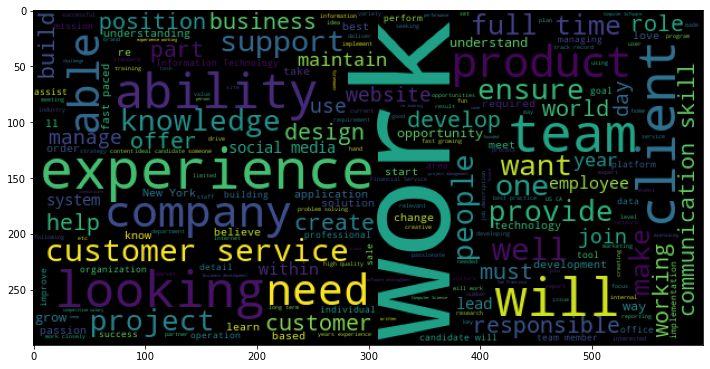

In [21]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud)
plt.show()

In [22]:
# frequency of word in real posting of jobs
real_post = ' '.join([text for text in data['text'][data['fraudulent']==0]])

In [23]:
wordcloud1 = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(real_post)

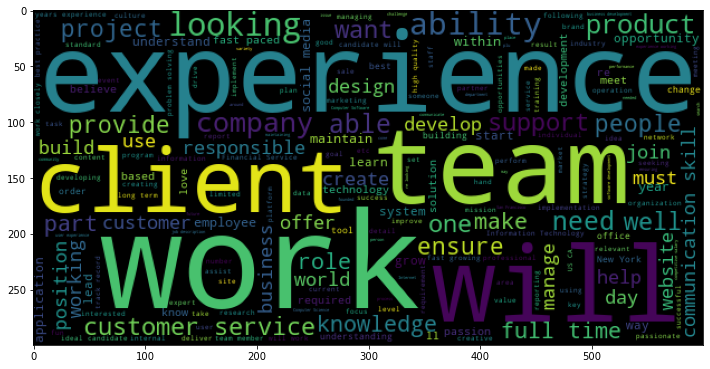

In [24]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud1)
plt.show()

In [25]:
# frequency of word in fake job postings
fake_post = ' '.join([text for text in data['text'][data['fraudulent'] == 1]])

In [26]:
wordcloud2 = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(fake_post)

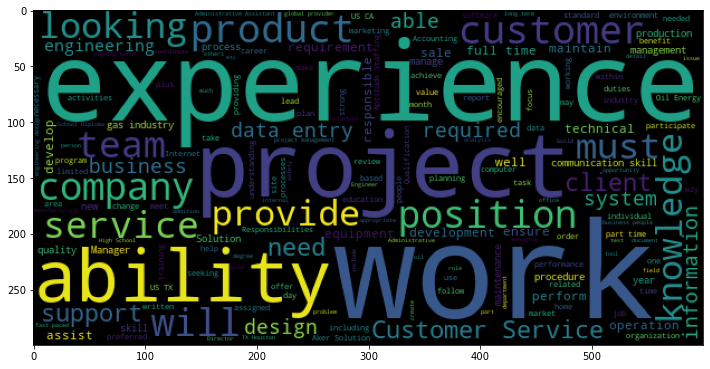

In [27]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud2)
plt.show()

In [28]:
import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords

In [29]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
stop_words = set(stopwords.words("english"))

In [31]:
data_t = pd.read_csv('zomato+hiring_posts.csv')

In [32]:
data_t

,Posting Account Name,Post Description,Posting Account Link
0,Debduhita Bose,Zomato Hyperpure is HIRING for Sales Manager/ ...,https://www.linkedin.com/in/debduhita-bose-a81...
1,Shivam Srivastava,hiring zomatoJOB:- CHAT/ VOICE/ SALESAND MANY ...,https://www.linkedin.com/in/shivam-srivastava-...
2,Prajnya Priyadarshini,*Hiring Alert - Zomato HP Chennai* #sales #b2b...,https://www.linkedin.com/in/prajnya-priyadarsh...
3,Som Dwivedi,Hiring!!!Zomato is hiring Data Analyst and Pro...,https://www.linkedin.com/in/som-dwivedi-7b404b...
4,Ravi Kumar,zomato hiring Freshers wfh Apply now jobrole: ...,https://www.linkedin.com/in/ravi-kumar-5a26362...
...,...,...,...
165,Shivankar S.,Domain names are the newest-coolest-chic thing...,https://www.linkedin.com/in/shivankarsharma?mi...
166,Sneha Samuel,"Ever wondered, with the fast-growing adaptatio...",https://www.linkedin.com/in/snehatsamuel?miniP...
167,Rahul Soni,Zomato's brilliant marketing strategy harnesse...,https://www.linkedin.com/in/rahulksoni?miniPro...
168,FLUODIGITAL MEDIA PVT. LTD.,The Pushpa actor has worked with the Zomato on...,https://www.linkedin.com/company/fluodigital-m...


In [33]:
data['text'] = data['text'].apply(lambda x:x.lower())

In [34]:
data_t.iloc[:,1] = data_t.iloc[:,1].apply(lambda x:str(x).lower())

In [35]:
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in(stop_words)]))

In [36]:
x_new_test = data_t.iloc[:,1].apply(lambda x:' '.join([word for word in x.split() if word not in(stop_words)]))

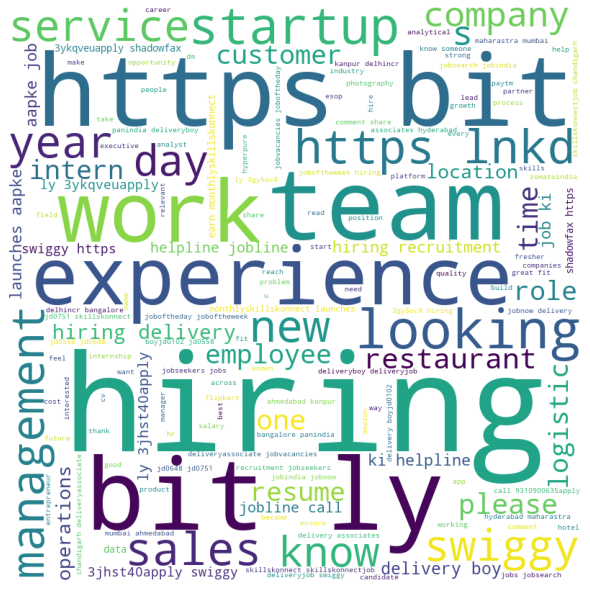

In [37]:
from wordcloud import WordCloud, STOPWORDS

words = ''
stopwords = set(STOPWORDS)
stopwords.update(["NA", "zomato", "india", "food", "business"])

# iterate through the csv file
for val in x_new_test:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [38]:
x_new_test[0]

"zomato hyperpure hiring sales manager/ key account managerlocation : kolkatalet's talk post filling google form attached!add factors:- 2-5 years sales experience.- preferred industry : food/ fmcg, b2b, e-commerce- horeca experience preferredkindly check attached jd : https://lnkd.in/ddgw3_v9form link : https://lnkd.in/dq6xprxk salil shinde#hiring"

In [39]:
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in(stop_words)]))

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train,y_test = train_test_split(data.text, data.fraudulent ,test_size =0.3)

# Classification Models

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, mean_absolute_error, make_scorer 

In [42]:
x_train2 = X_train.copy()

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [45]:
# Convert the text data into vector format 
X_train_dtm = vect.transform(X_train)

In [46]:
X_train_dtm

<12516x86256 sparse matrix of type '<class 'numpy.int64'>'
	with 2331836 stored elements in Compressed Sparse Row format>

In [47]:


from sklearn.naive_bayes import  MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

In [48]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5364x86256 sparse matrix of type '<class 'numpy.int64'>'
	with 967681 stored elements in Compressed Sparse Row format>

In [49]:
x_new_test_dtm = vect.transform(x_new_test)
x_new_test_dtm

<170x86256 sparse matrix of type '<class 'numpy.int64'>'
	with 6166 stored elements in Compressed Sparse Row format>

###### Naive Bayes Classifier

In [50]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [51]:
y_pred_nb = nb.predict(X_test_dtm)

In [52]:
y_zomato_nb = nb.predict(x_new_test_dtm)

In [53]:
accuracy_score(y_test,y_pred_nb)

0.9755779269202088

In [54]:
data_t["Naive_Bayes_Fraudulent"] = y_zomato_nb

##### Decision Tree Classifier

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train_dtm,y_train)

DecisionTreeClassifier()

In [56]:
y_pred_dt = dt.predict(X_test_dtm)

In [57]:
y_zomato_pred_dt = dt.predict(x_new_test_dtm)

In [58]:
accuracy_score(y_test,y_pred_dt)

0.9834079045488442

In [59]:
data_t["DecisionTree_Fraudulent"] = y_zomato_pred_dt

In [63]:
data_t

,Posting Account Name,Post Description,Posting Account Link,Naive_Bayes_Fraudulent,DecisionTree_Fraudulent
0,Debduhita Bose,zomato hyperpure is hiring for sales manager/ ...,https://www.linkedin.com/in/debduhita-bose-a81...,0,0
1,Shivam Srivastava,hiring zomatojob:- chat/ voice/ salesand many ...,https://www.linkedin.com/in/shivam-srivastava-...,0,0
2,Prajnya Priyadarshini,*hiring alert - zomato hp chennai* #sales #b2b...,https://www.linkedin.com/in/prajnya-priyadarsh...,0,0
3,Som Dwivedi,hiring!!!zomato is hiring data analyst and pro...,https://www.linkedin.com/in/som-dwivedi-7b404b...,0,1
4,Ravi Kumar,zomato hiring freshers wfh apply now jobrole: ...,https://www.linkedin.com/in/ravi-kumar-5a26362...,1,0
...,...,...,...,...,...
165,Shivankar S.,domain names are the newest-coolest-chic thing...,https://www.linkedin.com/in/shivankarsharma?mi...,0,0
166,Sneha Samuel,"ever wondered, with the fast-growing adaptatio...",https://www.linkedin.com/in/snehatsamuel?miniP...,0,0
167,Rahul Soni,zomato's brilliant marketing strategy harnesse...,https://www.linkedin.com/in/rahulksoni?miniPro...,0,0
168,FLUODIGITAL MEDIA PVT. LTD.,the pushpa actor has worked with the zomato on...,https://www.linkedin.com/company/fluodigital-m...,0,0


In [85]:
x_new_test[15]

'zomato hiring data sciences team across levels someone know interested please dm linkedin resume referral #hiring #team #zomatoindia #datasciencejobs #datasciencecareers'

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

In [87]:
y=data.fraudulent
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64


In [88]:
X=data.drop('fraudulent',1)
print(X.head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


C:\Users\Akkshit\AppData\Local\Temp\ipykernel_12036\1407801117.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('fraudulent',1)


In [89]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (12516, 0) (12516,)
Test set: (5364, 0) (5364,)


In [90]:
input_text = ['hiring zomatojob:- chat/ voice/ salesand many processeslaptop provided companypart time/ full time/ work homesalary:- upto 60,000 per monthfor details -']

In [91]:
for i in x_new_test_dtm:
    input_data = i

    prediction = dt.predict(input_data)

    if (prediction[0] == 1):
      print("This advertisement belonging to fake job post category")

    else:
      print("This advertisement belonging to real job post category")  

This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This advertisement belonging to real job post category
This adver

In [92]:
input_text = ['Data Entry Admin/Clerical Positions - Work From Home ']

In [93]:
input_data = vect.transform(input_text)

prediction = dt.predict(input_data)

if (prediction[0] == 1):
  print("This advertisement belonging to fake job post category")
  
else:
  print("This advertisement belonging to real job post category")  

This advertisement belonging to real job post category


In [64]:
data_t.to_csv('Fraud_detection_results.csv')